In [1]:
#importing libraries
import librosa
import librosa.display
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [2]:
import IPython.display as ipd

In [3]:
#download dataset
#The wget command is a command line utility for downloading files from the Internet.
#It supports downloading multiple files, downloading in the background, resuming downloads, limiting the bandwidth used for downloads and viewing headers.

!wget http://www.openslr.org/resources/12/dev-clean.tar.gz

--2020-06-18 07:09:01--  http://www.openslr.org/resources/12/dev-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337926286 (322M) [application/x-gzip]
Saving to: ‘dev-clean.tar.gz’

dev-clean.tar.gz    100%[===================>] 322.27M  10.2MB/s    in 2m 7s   

2020-06-18 07:11:08 (2.54 MB/s) - ‘dev-clean.tar.gz’ saved [337926286/337926286]



In [4]:
#could have also mounted the google drive and accesed the dataset when uploaded on drive mounted
#from google.colab import drive
#drive.mount("/content/gdrive")

In [5]:
#unzip file
import os
os.mkdir("/tmp/data/")
!tar -xf dev-clean.tar.gz -C /tmp/data

In [6]:
os.listdir('/tmp/data')

['LibriSpeech']

In [7]:
os.listdir('/tmp/data/LibriSpeech')

['dev-clean',
 'README.TXT',
 'BOOKS.TXT',
 'SPEAKERS.TXT',
 'CHAPTERS.TXT',
 'LICENSE.TXT']

In [8]:
#os.listdir('/tmp/data/LibriSpeech/README.TXT')
f = open('/tmp/data/LibriSpeech/README.TXT')
print(f.read())

1. General information

LibriSpeech is a corpus of read speech, based on LibriVox's public domain
audio books. Its purpose is to enable the training and testing of automatic
speech recognition(ASR) systems. 


2. Structure

The corpus is split into several parts to enable users to selectively download
subsets of it, according to their needs. The subsets with "clean" in their name
are supposedly "cleaner"(at least on average), than the rest of the audio and
US English accented. That classification was obtained using very crude automated 
means, and should not be considered completely reliable. The subsets are
disjoint, i.e. the audio of each speaker is assigned to exactly one subset.

The parts of the corpus are as follows:

* dev-clean, test-clean - development and test set containing "clean" speech.
* train-clean-100 - training set, of approximately 100 hours of "clean" speech
* train-clean-360 - training set, of approximately 360 hours of "clean" speech
* dev-other, test-other - deve

In [9]:
os.listdir('/tmp/data/LibriSpeech/dev-clean')

['7976',
 '652',
 '2035',
 '3853',
 '6319',
 '6313',
 '3752',
 '2086',
 '6345',
 '5338',
 '3081',
 '8297',
 '2803',
 '8842',
 '1988',
 '5694',
 '7850',
 '1673',
 '3536',
 '777',
 '2428',
 '5536',
 '6295',
 '2902',
 '2078',
 '3576',
 '84',
 '6241',
 '1272',
 '3000',
 '1462',
 '5895',
 '2277',
 '1919',
 '251',
 '1993',
 '2412',
 '422',
 '174',
 '3170']

In [10]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/251')

['136532', '118436', '137823']

In [11]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/251/136532')

['251-136532-0005.flac',
 '251-136532-0022.flac',
 '251-136532-0015.flac',
 '251-136532-0019.flac',
 '251-136532-0020.flac',
 '251-136532-0017.flac',
 '251-136532-0007.flac',
 '251-136532-0003.flac',
 '251-136532-0021.flac',
 '251-136532-0018.flac',
 '251-136532-0023.flac',
 '251-136532-0009.flac',
 '251-136532-0004.flac',
 '251-136532-0008.flac',
 '251-136532-0002.flac',
 '251-136532-0014.flac',
 '251-136532-0006.flac',
 '251-136532-0000.flac',
 '251-136532-0011.flac',
 '251-136532.trans.txt',
 '251-136532-0001.flac',
 '251-136532-0010.flac',
 '251-136532-0013.flac',
 '251-136532-0016.flac',
 '251-136532-0012.flac']

In [12]:
file = open('/tmp/data/LibriSpeech/dev-clean/251/136532/251-136532.trans.txt','r')
print(file.read())
#transcripts 

251-136532-0000 THEY ALSO FOUND A MARTIAN CALENDAR THE YEAR HAD BEEN DIVIDED INTO TEN MORE OR LESS EQUAL MONTHS AND ONE OF THEM HAD BEEN DOMA
251-136532-0001 BILL CHANDLER THE ZOOLOGIST HAD BEEN GOING DEEPER AND DEEPER INTO THE OLD SEA BOTTOM OF SYRTIS
251-136532-0002 THAT TOOK THE CENTER OF INTEREST AWAY FROM ARCHAEOLOGY AND STARTED A NEW BURST OF ACTIVITY
251-136532-0003 THE CIVILIAN SPECIALISTS IN OTHER FIELDS AND THE SPACE FORCE PEOPLE WHO HAD BEEN HOLDING TAPE LINES AND MAKING SKETCHES AND SNAPPING CAMERAS WERE ALL FLYING TO LOWER SYRTIS TO FIND OUT HOW MUCH OXYGEN THERE WAS AND WHAT KIND OF LIFE IT SUPPORTED
251-136532-0004 THEY HAD FOUR OR FIVE SPECIES OF WHAT MIGHT LOOSELY BE CALLED BIRDS AND SOMETHING THAT COULD EASILY BE CLASSED AS A REPTILE AND A CARNIVOROUS MAMMAL THE SIZE OF A CAT WITH BIRDLIKE CLAWS AND A HERBIVORE ALMOST IDENTICAL WITH THE PIGLIKE THING IN THE BIG DARFHULVA MURAL AND ANOTHER LIKE A GAZELLE WITH A SINGLE HORN IN THE MIDDLE OF ITS FOREHEAD
251-136532-0005 

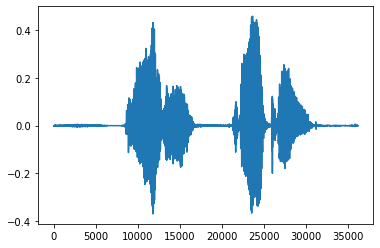

In [13]:
#plotting the .flac file
x, sr = librosa.load('/tmp/data/LibriSpeech/dev-clean/251/136532/251-136532-0014.flac', sr = 16000)
plt.plot(x)


In [14]:
print(type(x), type(sr))
#print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>


In [15]:
duration = len(x)/sr
duration

2.265

In [16]:
audio_fpath = "/tmp/data/LibriSpeech/dev-clean/251/136532/251-136532-0014.flac"
Audio(audio_fpath)

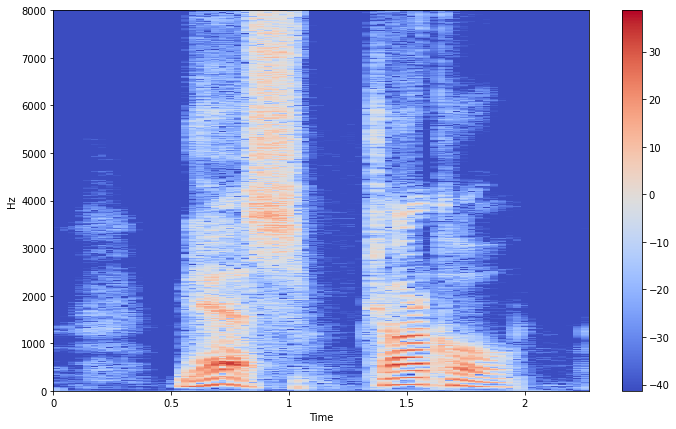

In [17]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12, 7))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [18]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

In [19]:
#data = load_audio_file(audio_fpath)
#plot_time_series(data)

In [20]:
#Hear it ! 
#ipd.Audio(data, rate=16000)

In [21]:
"""dev-clean has sub-directories which further have sub-directories 
   within which are stored .flac file and their corressponding transcripts.

   In the code below we try to access each of the transcripts and their .flac 
   files by running nested loops. We keep appending this data to make
   a list"""
def datadevclean():
  data = []
  for i in os.listdir('/tmp/data/LibriSpeech/dev-clean'):
    for j in os.listdir('/tmp/data/LibriSpeech/dev-clean/'+ i):
      for k in os.listdir('/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j):
        if k.endswith('trans.txt'):
          
          """we open each transcript and store the lines(as trans) and the 
            corresponding .flac file (as audiofile) of that line
            then we append it"""

          transfile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + k
          with open(transfile, "r") as file:
            for line in file:
              posofspace = line.find(' ',0,20)
              if (posofspace != -1):
                trans = line[(posofspace+1):]
                audiofile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + line[:posofspace] + '.flac'
                sample = (audiofile, trans)  
                data.append (sample)
          file.closed
  return data

Functions for data augmentation

In [22]:
def noise(data, noise_factor=0.005):
    # Adding white noise 
    
    noise = np.random.randn(len(data))
    augmented_data = data[0] + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

def shift(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift    

    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data

def pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)



Funtions for preparing a spectrogram from an audio file and then plotting it

In [23]:
def to_spectrogram(audio_file):
    # Loads the audio file and returns the spectrogram
    x, sr = librosa.load(audio_file, sr = 44100)
    X = librosa.stft(x)
    spectrogram = librosa.amplitude_to_db(abs(X))
    return spectrogram

def show_spectrogram(spectrogram, sr = 44100):
    plt.figure(figsize=(12, 7))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [24]:
r=to_spectrogram(audio_fpath)
r

array([[ -7.9149866, -15.395331 , -26.202248 , ..., -25.558777 ,
        -25.584133 , -38.01462  ],
       [ -7.1341014, -12.606432 , -30.099821 , ..., -18.19772  ,
        -22.684996 , -22.169989 ],
       [ -6.896784 , -12.091829 , -34.94454  , ..., -11.092558 ,
        -12.303398 , -24.232561 ],
       ...,
       [-38.01462  , -38.01462  , -38.01462  , ..., -38.01462  ,
        -38.01462  , -38.01462  ],
       [-38.01462  , -38.01462  , -38.01462  , ..., -38.01462  ,
        -38.01462  , -38.01462  ],
       [-38.01462  , -38.01462  , -38.01462  , ..., -38.01462  ,
        -38.01462  , -38.01462  ]], dtype=float32)

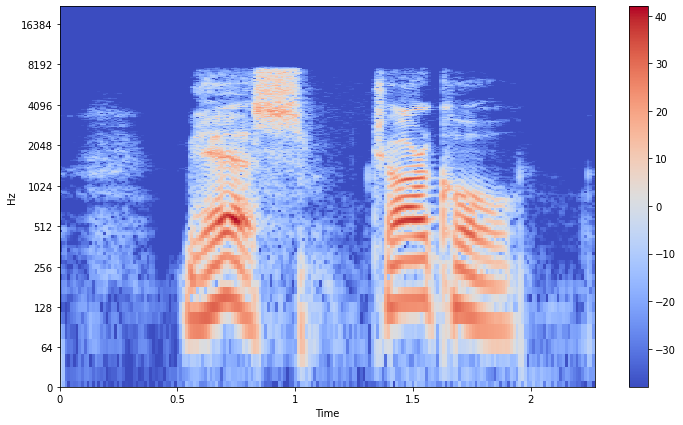

In [25]:
show_spectrogram(r, sr = 44100)

Function for replacing the punctions from the text file which may not be of very much importance
(would maybe help in reducing the computational complexicity)




In [26]:
def clean_label(s):
        s = s.strip()
        s = s.lower()
        s = s.replace(".", "")
        s = s.replace(",", "")
        s = s.replace("?", "")
        s = s.replace("!", "")
        s = s.replace(":", "")
        s = s.replace("-", " ")
        s = s.replace("_", " ")
        s = s.replace("  ", " ")
        return s

In [27]:
token_to_index={'<pad>': 0,
                'a': 1,
                'b': 2,
                'c': 3,
                'd': 4,
                'e': 5,
                'f': 6,
                'g': 7,
                'h': 8,
                'i': 9,
                'j': 10,
                'k': 11,
                'l': 12,
                'm': 13,
                'n': 14,
                'o': 15,
                'p': 16,
                'q': 17,
                'r': 18,
                's': 19,
                't': 20,
                'u': 21,
                'v': 22,
                'w': 23,
                'x': 24,
                'y': 25,
                'z': 26,
                ' ': 27,
                '\'':28
                }

In [28]:
def spectrogram_features(samples, samplerate, stridems=10.0,windowms=20.0, freqmax=None, eps=1e-14):
  """Compute the spectrograms for the input samples(waveforms)."""
  
  # samplerate is the number of times a signal is read in a second (eg n, then the signal is sampled every 1/n seconds)
  # windowms is the number of samples(window duration) in ms

  # samplerate/2 is the Nyquist frequency
  if freqmax is None:
    freqmax = samplerate / 2

  # raising exception when maximum freq is above Nyquist frequency  
  if freqmax > samplerate / 2:
    raise ValueError("freqmax must not be greater than half of sample rate.")

  if stridems > windowms:
    raise ValueError("Stride size must not be greater than window size.")

  # stride_size is the frame (window) overlap amplitudes (frequency bins)
  # each window is going to have window_size amplitudes
  stride_size = int(0.001 * samplerate * stridems)
  window_size = int(0.001 * samplerate * windowms)

  # Extract strided windows
  truncate_size = (len(samples) - window_size) % stride_size
  samples = samples[:len(samples) - truncate_size]
  nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
  nstrides = (samples.strides[0], samples.strides[0] * stride_size)
  windows = np.lib.stride_tricks.as_strided(
      samples, shape=nshape, strides=nstrides)
  assert np.all(
      windows[:, 1] == samples[stride_size:(stride_size + window_size)])

  # Window weighting, squared Fast Fourier Transform (fft), scaling
  # Weighting window is used here to handle discontinuity of this small signal
  weighting = np.hanning(window_size)[:, None]
  fft = np.fft.rfft(windows * weighting, axis=0)
  fft = np.absolute(fft)
  fft = fft**2
  scale = np.sum(weighting**2) * samplerate
  fft[1:-1, :] *= (2.0 / scale)
  fft[(0, -1), :] /= scale
  # Prepare fft frequency list
  freqs = float(samplerate) / window_size * np.arange(fft.shape[0])

  # Compute spectrogram feature
  ind = np.where(freqs <= freqmax)[0][-1] + 1
  specgram = np.log(fft[:ind, :] + eps)
  return np.transpose(specgram, (1, 0))

In [29]:
def label_feature(text, token_to_index):
  """Convert string to a list of integers."""

  # removing all the leading and trailing spaces from a string and then converting into lowercase and making a list of it
  tokens = list(text.strip().lower())
  features = [token_to_index[token] for token in tokens]
  return features

In [30]:
import numpy as np
import keras
import librosa
import __future__
import os
!pip install pysoundfile
import tensorflow as tf
import soundfile as sf 
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [31]:
data = datadevclean()
len((data))

print(len(data))

2703


In [32]:
traindata = data[:2500]
validdata = data[2500:]

In [33]:
np.arange(len(data))

array([   0,    1,    2, ..., 2700, 2701, 2702])

In [34]:
class DataGenerator (keras.utils.Sequence):

  def __init__(self, batch_size = 32, shuffle=True, dim = (1874,161)):
    # Constructor for the class assigning ivalues to object properties
    self.batch_size = batch_size
    # self.data = data
    self.data = datadevclean()
    self.list_IDs = np.arange(len(data))
    self.shuffle = shuffle
    self.on_epoch_end()
    self.dim = dim

  def __len__ (self):  
    # Returns number of batches per epoch
    #print int (np.floor (len (self.list_IDs) / self.batch_size))
    return int (np.floor (len (self.list_IDs) / self.batch_size))
 
  def __getitem__ (self, index):
    # Return index th batch of data

    # 'Generate indexes of the batch'
    indexes = self.indexes [index*self.batch_size:(index+1)*self.batch_size]
    # print (indexes)

    # 'Find list of IDs'
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    # print (list_IDs_temp)

    # 'Generate data'
    X, y = self.__data_generation (list_IDs_temp)

    return X, y

  def on_epoch_end (self):
    # Updates indexes or shuffle them after each epoch
    self.indexes = np.arange (len (self.list_IDs))
    if self.shuffle == True:
      np.random.shuffle (self.indexes)

  def __data_generation (self, list_IDs_temp):
    # Generates data containing batch_size samples
    X = np.empty((self.batch_size, *self.dim))
    Y = np.empty((self.batch_size), dtype =list)
    for i, ID in enumerate(list_IDs_temp):

      audiofilepath, transcript = data[i]
      audio, samplerate = sf.read(audiofilepath)
      linetoidx = label_feature(transcript, token_to_index)
      
      if len(audio)>300000:
            audio = audio[:300000]
      else:
            audio = np.pad(audio, (0, max(0, 300000 - len(audio))), "constant")
      x = spectrogram_features(audio, samplerate, stridems=10.0,
                                windowms=20.0, freqmax=None, eps=1e-14)
      if len(linetoidx) > 500:
        linetoidx = linetoidx[:500]
      else:
        linetoidx = np.pad(linetoidx, (0, max(0, 500 - len(linetoidx))), "constant")
  
      X[i,]=x
      Y[i]=list(linetoidx)
    return X, Y

84
[-30.44825675 -25.30962934 -23.07939974 -22.49042081 -21.64001134
 -21.58085386 -22.49685924 -23.01325017 -23.04886688 -23.81171081
 -24.53948372 -24.60876204 -23.39218853 -23.84984013 -25.01315029
 -25.89783339 -25.03097923 -25.27977783 -24.4751722  -25.38757215
 -25.40862385 -25.87953397 -27.65074159 -27.62264592 -26.32312516
 -27.7692609  -27.0697329  -25.69689013 -25.20263677 -26.31165863
 -29.07931398 -25.76927219 -26.25232621 -26.93439465 -25.87940518
 -25.49708403 -26.22163492 -26.59494609 -27.07508293 -26.99565351
 -24.93587753 -25.30724169 -26.06468484 -25.58108917 -26.10694254
 -26.84281588 -27.68153591 -28.7236945  -27.25504004 -27.49878794
 -27.14645667 -27.18968334 -28.26812147 -27.47551228 -25.90665034
 -25.73100797 -29.70440465 -26.55880753 -25.97011658 -26.70459632
 -29.64740566 -26.13274241 -25.84879872 -27.68392186 -28.83739974
 -27.65853029 -29.34443816 -28.81459101 -27.97593471 -26.26044368
 -25.80652357 -26.52015326 -26.4570686  -26.75239932 -27.41166677
 -26.77

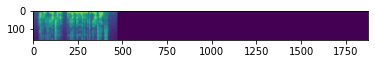

In [35]:
train = DataGenerator()
print(len(train))
x, y =train.__getitem__(1)
print(x[1][1])
print(x[1])
print(len(x[1]))
print(y[1])
print(len(y[1]))
plt.imshow(np.transpose(x[1]))